In [1]:
# Importing the required libraries
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# keras tuner installation
! pip install keras-tuner

# deeplearning packages
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

# metrics to validate
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

# ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 6.3 MB/s eta 0:00:00


In [4]:
# Data import

# data source - https://keras.io/api/datasets/fashion_mnist/

# data loading
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# data dimensions
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
# Classes
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
# data fot the first image
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [ ]:
# [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  0   0   0   0   0   0   0   0   0   0]
#  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  0   0   0   0   0   0   0   0   0   0]
#  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  0   0   0   0   0   0   0   0   0   0]
#  [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0  0   1   4   0   0   0   0   1   1   0]
#  [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
#  [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134  144 123  23   0   0   0   0  12  10   0]
#  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178  107 156 161 109  64  23  77 130  72  15]
#  [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216  216 163 127 121 122 146 141  88 172  66]
#  [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229  223 223 215 213 164 127 123 196 229   0]
#  [  0   0   0   0   0   0   0   0   0   0   0   0   0 183 225 216 223 228  235 227 224 222 224 221 223 245 173   0]
#  [  0   0   0   0   0   0   0   0   0   0   0   0   0 193 228 218 213 198  180 212 210 211 213 223 220 243 202   0]
#  [  0   0   0   0   0   0   0   0   0   1   3   0  12 219 220 212 218 192  169 227 208 218 224 212 226 197 209  52]
#  [  0   0   0   0   0   0   0   0   0   0   6   0  99 244 222 220 218 203  198 221 215 213 222 220 245 119 167  56]
#  [  0   0   0   0   0   0   0   0   0   4   0   0  55 236 228 230 228 240  232 213 218 223 234 217 217 209  92   0]
#  [  0   0   1   4   6   7   2   0   0   0   0   0 237 226 217 223 222 219  222 221 216 223 229 215 218 255  77   0]
#  [  0   3   0   0   0   0   0   0   0  62 145 204 228 207 213 221 218 208  211 218 224 223 219 215 224 244 159   0]
#  [  0   0   0   0  18  44  82 107 189 228 220 222 217 226 200 205 211 230  224 234 176 188 250 248 233 238 215   0]
#  [  0  57 187 208 224 221 224 208 204 214 208 209 200 159 245 193 206 223  255 255 221 234 221 211 220 232 246   0]
#  [  3 202 228 224 221 211 211 214 205 205 205 220 240  80 150 255 229 221  188 154 191 210 204 209 222 228 225   0]
#  [ 98 233 198 210 222 229 229 234 249 220 194 215 217 241  65  73 106 117  168 219 221 215 217 223 223 224 229  29]
#  [ 75 204 212 204 193 205 211 225 216 185 197 206 198 213 240 195 227 245  239 223 218 212 209 222 220 221 230  67]
#  [ 48 203 183 194 213 197 185 190 194 192 202 214 219 221 220 236 225 216  199 206 186 181 177 172 181 205 206 115]
#  [  0 122 219 193 179 171 183 196 204 210 213 207 211 210 200 196 194 191  195 191 198 192 176 156 167 177 210  92]
#  [  0   0  74 189 212 191 175 172 175 181 185 188 189 188 193 198 204 209  210 210 211 188 188 194 192 216 170   0]
#  [  2   0   0   0  66 200 222 237 239 242 246 243 244 221 220 193 191 179  182 182 181 176 166 168  99  58   0   0]
#  [  0   0   0   0   0   0   0  40  61  44  72  41  35   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
#  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
#  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]]

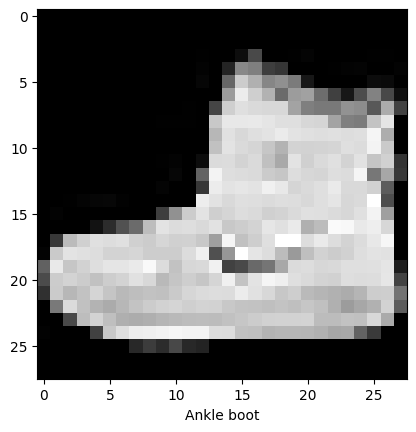

In [11]:
# display the first image
plt.imshow(x_train[0], cmap='grey')
plt.xlabel(classes[y_train[0]])
plt.show()

In [14]:
# data scaling
x_train = x_train / 255.0
x_test = x_test / 255.0

In [18]:
# dimension of the data
print(x_train.ndim)
print(x_test.ndim)

# shape of the image
print(x_train.shape)
print(x_test.shape)

# the image has to be in 4 dimensions (ie., no.of.images x height x width x layers)

3
3
(60000, 28, 28)
(10000, 28, 28)


In [19]:
# reshaping the data into 4 dimensions - [# of images, # rows, # cols, # layers]

x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)

In [20]:
# Building a hyper model

def hyper_model(hp):
    model = Sequential([
        Conv2D(filters = hp.Int('conv_1_filter', min_value=16, max_value=128, step=8),      # no.of.filters
               kernel_size = hp.Choice('conv_1_kernel', values=[3,4,5]),                    # filter size
               activation = 'relu',
               input_shape = (28, 28, 1)),
        Conv2D(filters = hp.Int('conv_2_filter', min_value=8, max_value=64, step=4),        # no.of.filters
               kernel_size = hp.Choice('conv_2_kernel', values=[3,4,5]),                    # filter size
               activation = 'relu'),
        MaxPooling2D((2, 2)),

        Flatten(),

        Dense(units=hp.Int('dense_1_units',
                            min_value=32, max_value=256, step=4),
              activation='relu'),
        Dense(units=hp.Int('dense_2_units',
                            min_value=32, max_value=128, step=4),
              activation='relu'),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [21]:
tuner_output = RandomSearch(hyper_model,
                            objective='val_accuracy',
                            max_trials=5,
                            project_name='Mnist Optimization')

In [22]:
# tuner search
tuner_output.search(x_train, y_train, epochs=10, validation_split=0.2, batch_size=32)

Trial 5 Complete [00h 01m 29s]
val_accuracy: 0.8859999775886536

Best val_accuracy So Far: 0.9225833415985107
Total elapsed time: 00h 08m 03s


In [23]:
# Extracting the best hyperparameters out of all search
final_model = tuner_output.get_best_models(num_models=1)[0]

# best model summary
final_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 60)     │       192,060 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 11, 11, 60)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7260)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │     1,452,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 120)            │        24,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,670,870 (6.37 MB)

 Trainable params: 1,670,870 (6.37 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# fitting the data onto the final model

final_model.fit(x_train, y_train, epochs=15, initial_epoch=10, validation_split=0.2)

Epoch 11/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9500 - loss: 0.1357 - val_accuracy: 0.9203 - val_loss: 0.2209
Epoch 12/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9555 - loss: 0.1211 - val_accuracy: 0.9198 - val_loss: 0.2359
Epoch 13/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9625 - loss: 0.1041 - val_accuracy: 0.9208 - val_loss: 0.2339
Epoch 14/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9696 - loss: 0.0878 - val_accuracy: 0.9253 - val_loss: 0.2309
Epoch 15/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9746 - loss: 0.0736 - val_accuracy: 0.9243 - val_loss: 0.2420


In [26]:
# model evaluation
final_model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9145 - loss: 0.2706


[0.25282400846481323, 0.9186000227928162]

In [27]:
# model predictions
y_pred = final_model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [34]:
# index number of the predicted class based on the highest probability
y_class = np.array([np.argmax(ele) for ele in y_pred])

In [35]:
# printing the first five outputs
print('The actual label for the first 5 images:', y_test[0:5])
print('The predicted label for the first 5 images:', y_class[0:5])

The actual label for the first 5 images: [9 2 1 1 6]
The predicted label for the first 5 images: [9 2 1 1 6]


In [43]:
# function to validate a random image

def validate_rdm_img():
    rdm_img = random.randint(0, len(x_test))
    plt.imshow(x_test[rdm_img], cmap='grey')
    plt.show()

    print('Actual Image is:', classes[y_test[rdm_img]])
    print('Predicted Image is:', classes[y_class[rdm_img]])
    print('Prediction Proababiity is:', round(y_pred[rdm_img][y_class[rdm_img]]*100, 2), '%')

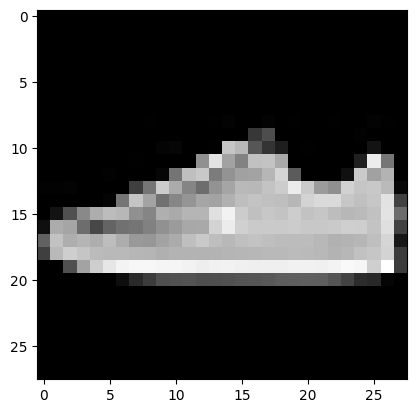

Actual Image is: Sneaker
Predicted Image is: Sneaker
Prediction Proababiity is: 100.0 %


In [54]:
# function call
validate_rdm_img()

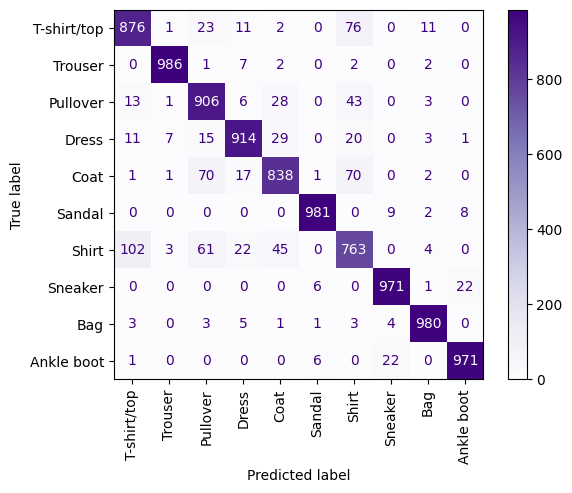

In [58]:
# validation metrics
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_class, display_labels=classes, xticks_rotation='vertical', cmap='Purples')

In [ ]:
# classification report
report = classification_report(y_test, y_class, target_names=classes)
print(report)